In [1]:
import pandas as pd # obvious imports.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D # explain new imports?

Above we used a new Python libary to aid our anaysis, 'mpplot3d'. The libary 'mpplot3d' gives us the ability to plot graphs in 3-dimensions, this is required as trends can be found between 3 planetary charactersitics.

In [2]:
oec = pd.read_csv("oec.csv") # load .csv file
# WOULD IT MAKE MORE SENSE TO PUT IMPORTS IN A SPERATE CELL?

In [3]:
oec # displays csv

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,...,dec,st_dist,st_optmag,st_optband,gaia_gmag,st_teff,st_mass,st_rad,rowupdate,pl_facility
0,11 Com,b,11 Com b,Radial Velocity,0,1,326.030000,1.290000,0.2310,NaN,...,17.792868,93.37,4.740,V (Johnson),4.372,4742.0,2.70,19.00,14/05/2014,Xinglong Station
1,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.219970,1.530000,0.0800,NaN,...,71.823898,125.72,5.016,V (Johnson),4.500,4213.0,2.78,29.79,06/09/2018,Thueringer Landessternwarte Tautenburg
2,14 And,b,14 And b,Radial Velocity,0,1,185.840000,0.830000,0.0000,NaN,...,39.236198,75.59,5.227,V (Johnson),4.872,4813.0,2.20,11.00,14/05/2014,Okayama Astrophysical Observatory
3,14 Her,b,14 Her b,Radial Velocity,0,1,1773.400020,2.930000,0.3700,NaN,...,43.817646,17.94,6.610,V (Johnson),6.379,5338.0,0.90,0.93,06/09/2018,W. M. Keck Observatory
4,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1,798.500000,1.660000,0.6800,NaN,...,50.517525,21.41,6.250,V (Johnson),6.057,5750.0,1.08,1.13,06/09/2018,Multiple Observatories
5,18 Del,b,18 Del b,Radial Velocity,0,1,993.300000,2.600000,0.0800,NaN,...,10.839286,76.38,5.506,V (Johnson),5.244,4979.0,2.30,8.50,14/05/2014,Okayama Astrophysical Observatory
6,1RXS J160929.1-210524,b,1RXS J160929.1-210524 b,Imaging,0,1,NaN,330.000000,NaN,NaN,...,-21.083036,145.00,NaN,NaN,12.057,4060.0,0.85,NaN,01/04/2015,Gemini Observatory
7,24 Boo,b,24 Boo b,Radial Velocity,0,1,30.350600,0.190000,0.0420,NaN,...,49.844852,96.25,5.580,V (Johnson),5.305,4893.0,0.99,10.64,26/04/2018,Okayama Astrophysical Observatory
8,24 Sex,b,24 Sex b,Radial Velocity,0,2,452.800000,1.333000,0.0900,NaN,...,-0.902244,72.21,6.441,V (Johnson),6.198,5098.0,1.54,4.90,14/05/2014,Lick Observatory
9,24 Sex,c,24 Sex c,Radial Velocity,0,2,883.000000,2.080000,0.2900,NaN,...,-0.902244,72.21,6.441,V (Johnson),6.198,5098.0,1.54,4.90,14/05/2014,Lick Observatory


Here we are reading in our dataset into a dataframe and displaying it, this allows us to easily check column names etc.

In [25]:
massPeriod = oec[['pl_orbper','pl_bmassj','pl_discmethod']] # creates dataframe with the 3 columns we want

We often take 3 columns out of the dataset as we were advised to plot particular data to demonstrate key concepts which heavily relate to habitability. For example, in this instance we are plotting planetary mass (in jupiter masses) against orbital period (days). We are also colour coding the plot using the discovery method of the planet as advised by our astrohpysics contact.

Instead of doing basic calculations involving planetary charactersitcs we plan to implement a machine-learning algorithm using clustering to determine a large pool of candidates which could be narrowed down with further analysis in future if we were to take this project further.

In [6]:
def StringToNum(dataFrame): # function which re-maps the string to numbers to color, for a clearer graph.
    # CAN WE KEEP THIS FUNCTION IN IT'S OWN CELL FOR READIBILITY? 
    # Better way to do this Owain, use the .replace() function of the dataframe and pass it a dictionary
    for i in range(len(dataFrame)): 
        
        if dataFrame.loc[i, 'pl_discmethod'] == 'Radial Velocity':
            dataFrame.at[i , 'pl_discmethod'] = 1
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Transit':
            dataFrame.at[i , 'pl_discmethod'] = 2
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Microlensing':
            dataFrame.at[i , 'pl_discmethod'] = 3
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Imaging':
            dataFrame.at[i , 'pl_discmethod'] = 4
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Astrometry':
            dataFrame.at[i , 'pl_discmethod'] = 5
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Eclipse Timing Variations':
            dataFrame.at[i , 'pl_discmethod'] = 6
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Transit Timing Variations':
            dataFrame.at[i , 'pl_discmethod'] = 7
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Pulsar Timing':
            dataFrame.at[i , 'pl_discmethod'] = 8
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Orbital Brightness Modulation':
            dataFrame.at[i , 'pl_discmethod'] = 9
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Pulsation Timing Variations':
            dataFrame.at[i , 'pl_discmethod'] = 10
# I MOVED IT SO IT'S IN IT'S OWN CELL.

The above funtion encodes numers into the dataframe so we are able to colour our clusterings in terms of discovery method which allows us to draw interesting ideas; such that similar planets seem to have been discovered by the same means rather than lots of different telescopes or analysis techniques used to detect all sorts of different planets. Could this suggest uncertainty in the discovery of that planet? for example if all rocky planets are discovered in the same way, may this mistake a lare hot jupiter as a rocky planet becuase this method was used to detect that planet? This could be something additional to explore outside of this project.


In [26]:
StringToNum(massPeriod)

massPeriod = massPeriod[pd.notnull(massPeriod['pl_orbper'])] #Removes planets which do not have a recorded orbital period
massPeriod = massPeriod[pd.notnull(massPeriod['pl_bmassj'])] #Removes planets which do not have a recorded mass

The above cell removes planets which have missing values for either orbital period of planetary mass, furthermore it also calls the StringToNum function on the dataframe allowing us to colour code using discovery method.

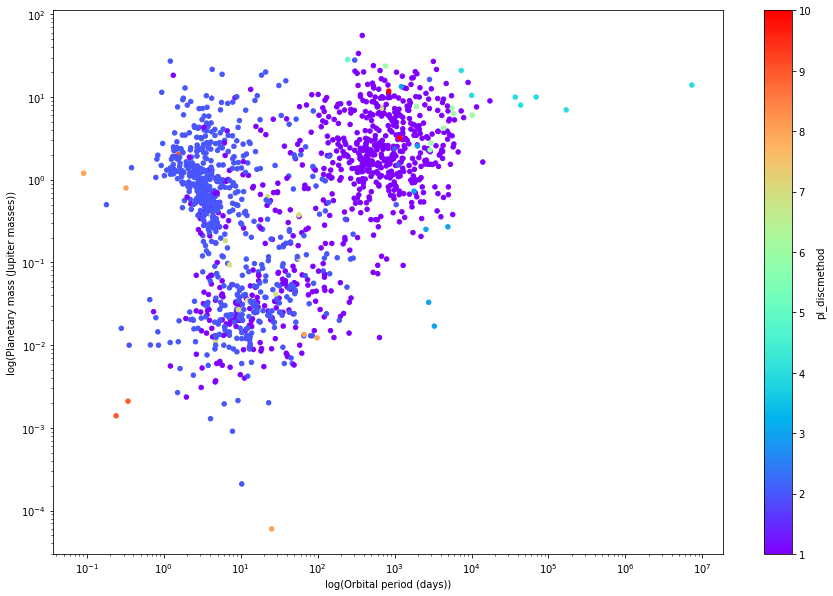

In [27]:
fig, ax2 = plt.subplots()

ax2.set_yscale('log')
ax2.set_xscale('log')# Each axis is log base 10.

fig = massPeriod.plot.scatter('pl_orbper','pl_bmassj', c = 'pl_discmethod', colormap='rainbow', ax = ax2 , figsize =(15,10)) #Plots scatter graph

#WE NEED TO ADD CLEAR LABELS ON EACH AXIS - THEY MAKE LITTLE SENSE.

fig.set_ylabel('log(Planetary mass (Jupiter masses))')
fig.set_xlabel('log(Orbital period (days))')
plt.show()

The above graph (log of planetary mass agaisnt log of orbital period) shows clear clustering, after researching this we determined that each cluster in the graph refers to a different classification of planet. The top-left being 'Hot Jupiters', a classfication of planet physically similar to Jupiter though however with a high surface/atmosphere temperature. The top right cluster are 'Cold Gas Giants', similary these are gas giants with a lower surface/atmosphere temperature than Jupiter. Finally and most importantly the bottom cluster are 'super-earths'.

These super earths are rocky worlds with a mass larger than that of Earth, hence they are potential candidates for habitable planets. On the otherhand, clearly we can exclude the top left and right clusters as gas giants are unsuitable for human life and hence can be considered unhabitable.

Hence, using the idea of clustering we can potentially get a subset of exoplanets which may be habitable.

In [28]:
semiMajorAxisOrbitalPeriod = oec[["pl_orbsmax", "pl_orbper"]]

semiMajorAxisOrbitalPeriod = semiMajorAxisOrbitalPeriod[pd.notnull(semiMajorAxisOrbitalPeriod['pl_orbsmax'])]
semiMajorAxisOrbitalPeriod = semiMajorAxisOrbitalPeriod[pd.notnull(semiMajorAxisOrbitalPeriod['pl_orbper'])] #Removes planets which do not have a recorded orbital period

The code in the above cell creates a new dataframe containing each planets orbital radius and orbital period. We then clean the dataframe by removing any planets which do not have a recorded orbital radius or orbital period.

In [29]:
semiMajorAxisOrbitalPeriod["pl_orbsmaxCubed"] = semiMajorAxisOrbitalPeriod["pl_orbsmax"] ** 3
semiMajorAxisOrbitalPeriod["pl_orbperSquared"] = semiMajorAxisOrbitalPeriod["pl_orbper"] ** 2

semiMajorAxisOrbitalPeriod = semiMajorAxisOrbitalPeriod[semiMajorAxisOrbitalPeriod['pl_orbsmaxCubed'] < 300] #Restricts max value on axis
semiMajorAxisOrbitalPeriod = semiMajorAxisOrbitalPeriod[semiMajorAxisOrbitalPeriod['pl_orbperSquared'] < 40000000] #Restricts max value on axis

This code firstly cubes all orbital raidus' and squares all orbital periods. The reason being is that Keplers third law is the following: 'The square of the orbital period of a planet is directly proportional to the cube of the semi-major axis of its orbit.'. Hence this indicates that there is likely to be a trend between these two properties.

In addition, we also restrict the values for each properties the reason being that some planets have very large values causing the graph not too display a clear trend. Restricting these values makes the trend more visible. It should be noted however that the trend does hold for these extrememe values it just is not clear when plotted on a graph.

Text(0,0.5,'Semi-major axis cubed (AU)')

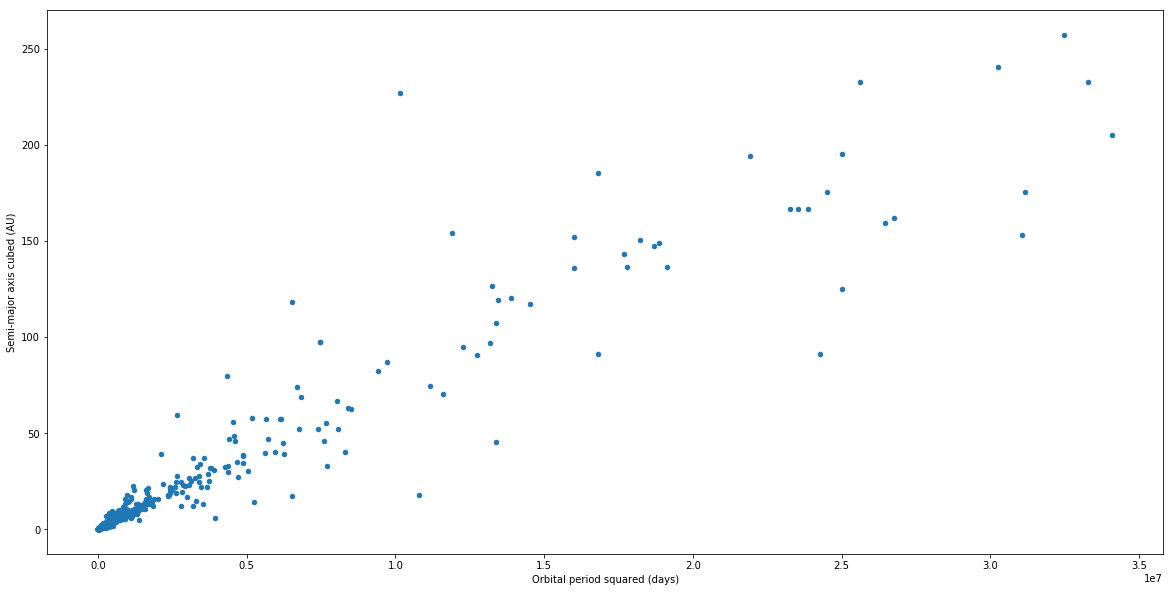

In [10]:
fig = semiMajorAxisOrbitalPeriod.plot.scatter("pl_orbperSquared", "pl_orbsmaxCubed", figsize=(20,10)) #Plots scatter graph

fig.set_xlabel("Orbital period squared (days)")
fig.set_ylabel("Semi-major axis cubed (AU)")


The above graph demonstrate keplers third law. 

In astronomy, Kepler's laws of planetary motion are three scientific laws describing the motion of planets around the Sun. 

* The orbit of a planet is an ellipse with the Sun at one of the two foci.
* A line segment joining a planet and the Sun sweeps out equal areas during equal intervals of time.
* The square of the orbital period of a planet is directly proportional to the cube of the semi-major axis of its orbit.

Although keplers third law doesn't help us much with habilitbility, in fact doesn't really help us with determining planetary habitability at all. it gives us confidence in our work and correctness so far.

If we are able to demonstrate keplers third law then we know we are on track and are following correct relationships of our data to then determine which planets could be a potential candidate for habilitibility.

In [11]:
eccentricityPeriod = oec[["pl_orbeccen", "pl_orbper", "pl_discmethod"]] # creates datafram for the 3 selected columns shown.

StringToNum(eccentricityPeriod)

eccentricityPeriod = eccentricityPeriod[pd.notnull(eccentricityPeriod['pl_orbeccen'])]
eccentricityPeriod = eccentricityPeriod[pd.notnull(eccentricityPeriod['pl_orbper'])] #Removes planets which do not have a recorded orbital period
eccentricityPeriod = eccentricityPeriod[pd.notnull(eccentricityPeriod['pl_discmethod'])]

This code creates a new dataframe containing three planetary characteristics: eccentricity, orbital period and discovery method. The discovery method is used as before to colour code the plot. Again, the discovery method column is converted to a integer value allowing us to apply it to a colour map. Null values are also removed from the dataframe with the last 3 lines.

In [12]:
eccentricityPeriod = eccentricityPeriod[eccentricityPeriod['pl_orbper'] < 40000]

This cell simply restricts the values to better show the trend, this value was found after multiple tries.

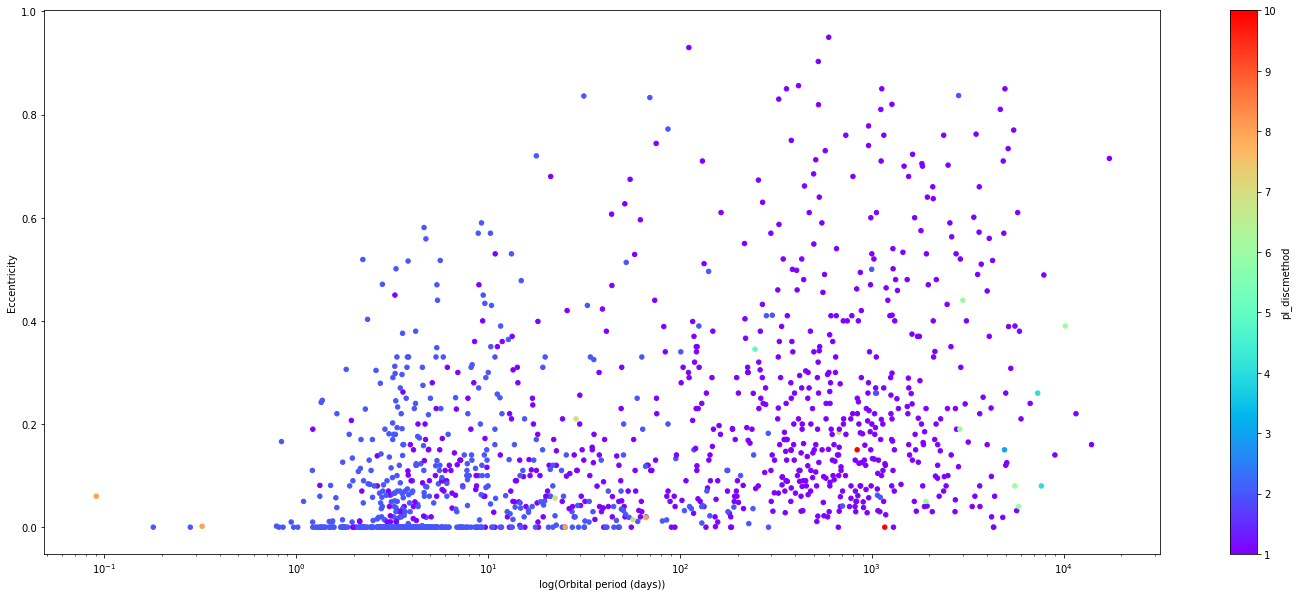

In [13]:
fig, ax = plt.subplots()

eccentricityPeriod.plot(kind='scatter',x='pl_orbper', y='pl_orbeccen', c='pl_discmethod', ax=ax, colormap='rainbow',figsize=(25, 10)) #Plots scatter graph
# I tried to be consistant with spacing.
ax.set_xlabel("pl_orbper")
ax.set_xscale("log")
ax.set_ylabel("Eccentricity")
ax.set_xlabel("log(Orbital period (days))")

plt.show()

The above graph plots the log(Orbital period (days)) in the X against the Eccentricity in the Y.

This describes the "objects" distance from its sun.

this is very helpful in planetary habilitibility as it relates to the habitable zone commonly known as the "goldilocks zone." The "Goldilocks zone" is a zone where the distance between the "Object" (planet) and the sun is in a zone; such that the planet is "not too hot" or "not too cold" hence the common name "goldilocks zone" in relation to the book; named "goldilocks and the three bears" written by Robert Southey.

If the planet is on the "goldilocks zone" then the planet has the right temperature for liquid water to exist on the planet. If the planet has potential for liquid water, the planet then has the chance of supporting life. for life to exist the planet must contain liquid water.

So depending on whether or not the planets are within the "goldilocks zone" contributes greatly to whether or not that planet can be habitable.

In [14]:
massSemiMajor = oec[["pl_orbsmax", "pl_bmassj", "pl_discmethod"]]

StringToNum(massSemiMajor)

massSemiMajor = massSemiMajor[pd.notnull(massSemiMajor['pl_orbsmax'])]
massSemiMajor = massSemiMajor[pd.notnull(massSemiMajor['pl_bmassj'])]
massSemiMajor = massSemiMajor[pd.notnull(massSemiMajor['pl_discmethod'])]

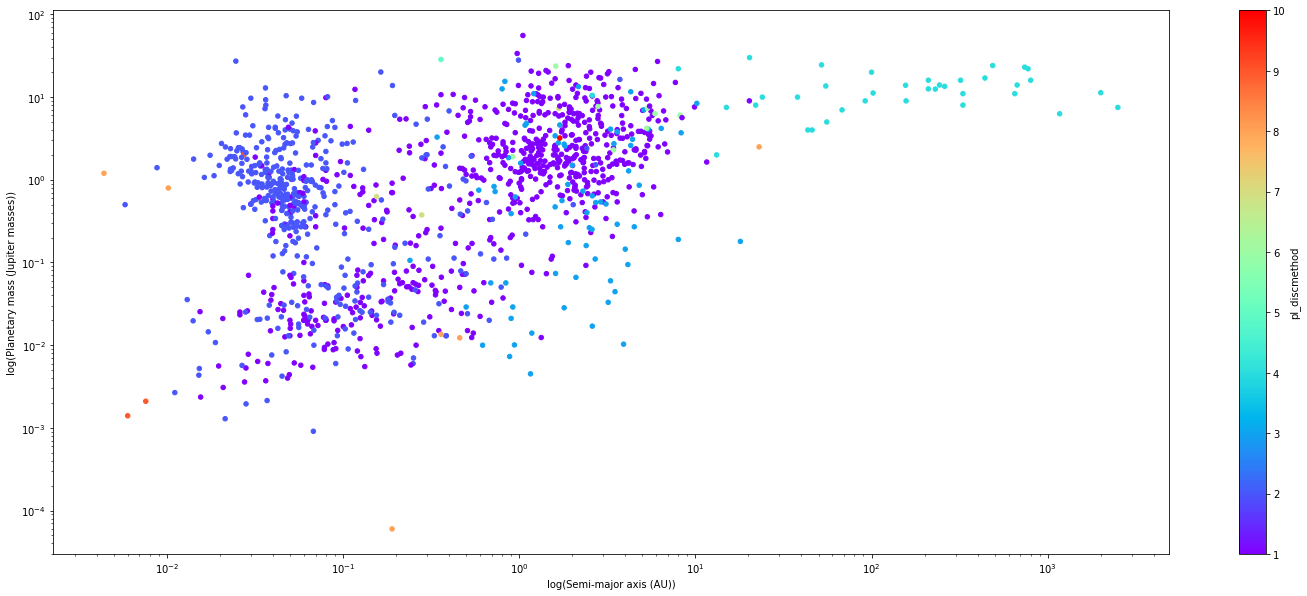

In [15]:
fig, ax = plt.subplots()

ax.set_yscale("log")
ax.set_xscale("log")

massSemiMajor.plot(kind='scatter',x='pl_orbsmax', y='pl_bmassj', c='pl_discmethod', ax=ax, colormap='rainbow',figsize=(25, 10)) #Plots scatter graph

#WE NEED TO ADD AXIS LABELS AGAIN. - yeah done.

ax.set_xlabel("log(Semi-major axis (AU))")
ax.set_ylabel("log(Planetary mass (Jupiter masses))")

plt.show()
# for new graph plot radius against orbital period. - radius column is called = pl_radiusj

# WE NEED TO WRITE MARKDOWN TO CLEARLY CONVEY OUR CONCLUSIONS.

The above graph..

In [16]:
periodRadius = oec[["pl_orbper", "pl_radj", "pl_discmethod"]]

StringToNum(periodRadius)

periodRadius = periodRadius[pd.notnull(periodRadius['pl_orbper'])]
periodRadius = periodRadius[pd.notnull(periodRadius["pl_radj"])]
periodRadius = periodRadius[pd.notnull(periodRadius["pl_discmethod"])]

,pl_orbper,pl_radj,pl_discmethod
15,7336.500000,0.920,4
28,0.736539,0.170,1
48,41.685500,0.230,2
63,1.508956,1.490,2
64,13.240600,0.970,2
65,2.994330,1.430,2
66,2.828042,1.440,2
67,4.035190,0.885,2
68,1.512140,1.090,2
69,5.352270,1.170,2


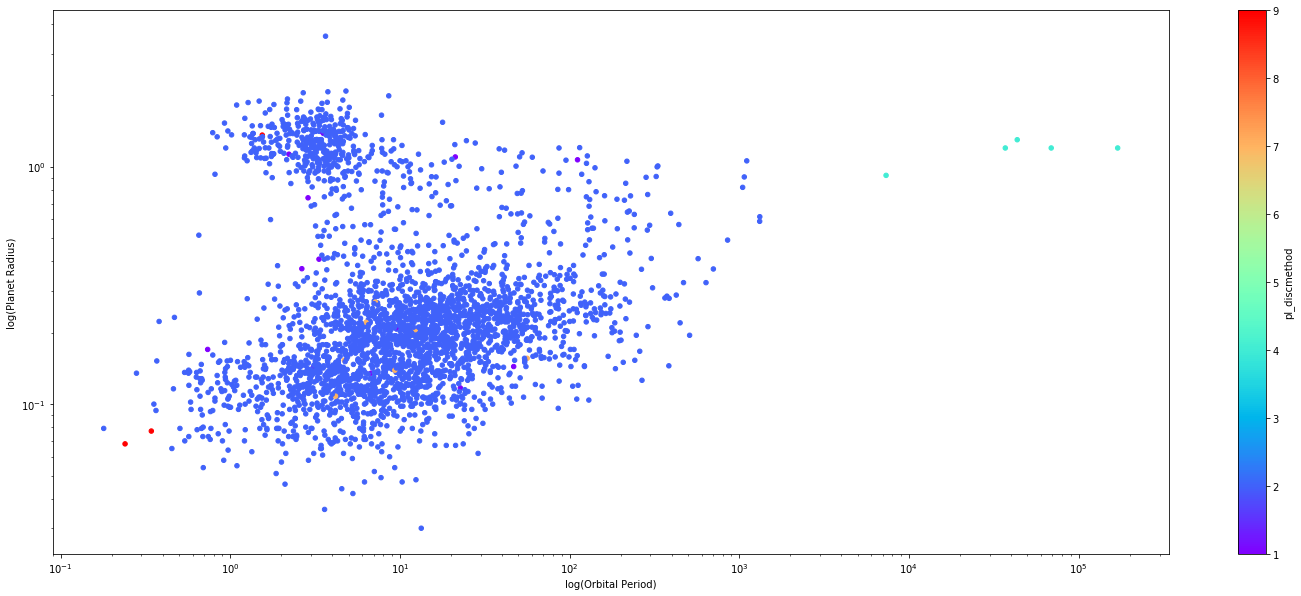

In [17]:
fig, ax = plt.subplots()

ax.set_yscale("log")
ax.set_xscale("log")

periodRadius.plot(kind='scatter',x='pl_orbper', y="pl_radj", c='pl_discmethod', ax=ax, colormap='rainbow',figsize=(25, 10)) #Plots scatter graph

ax.set_xlabel("log(Orbital Period)")
ax.set_ylabel("log(Planet Radius)")

plt.show()
# for new graph plot radius against orbital period. - radius column is called = pl_radiusj

# WE NEED TO WRITE MARKDOWN TO CLEARLY CONVEY OUR CONCLUSIONS.

In [18]:
radiusPeriod = oec[["pl_orbsmax", "pl_orbper", "pl_discmethod"]]

StringToNum(radiusPeriod)

radiusPeriod = radiusPeriod[pd.notnull(radiusPeriod['pl_orbsmax'])]
radiusPeriod = radiusPeriod[pd.notnull(radiusPeriod['pl_orbper'])] #Removes planets which do not have a recorded orbital period
radiusPeriod = radiusPeriod[pd.notnull(radiusPeriod['pl_discmethod'])]

In [19]:
radiusPeriod = radiusPeriod[radiusPeriod['pl_orbsmax'] < 10]
radiusPeriod = radiusPeriod[radiusPeriod['pl_orbper'] < 5000]

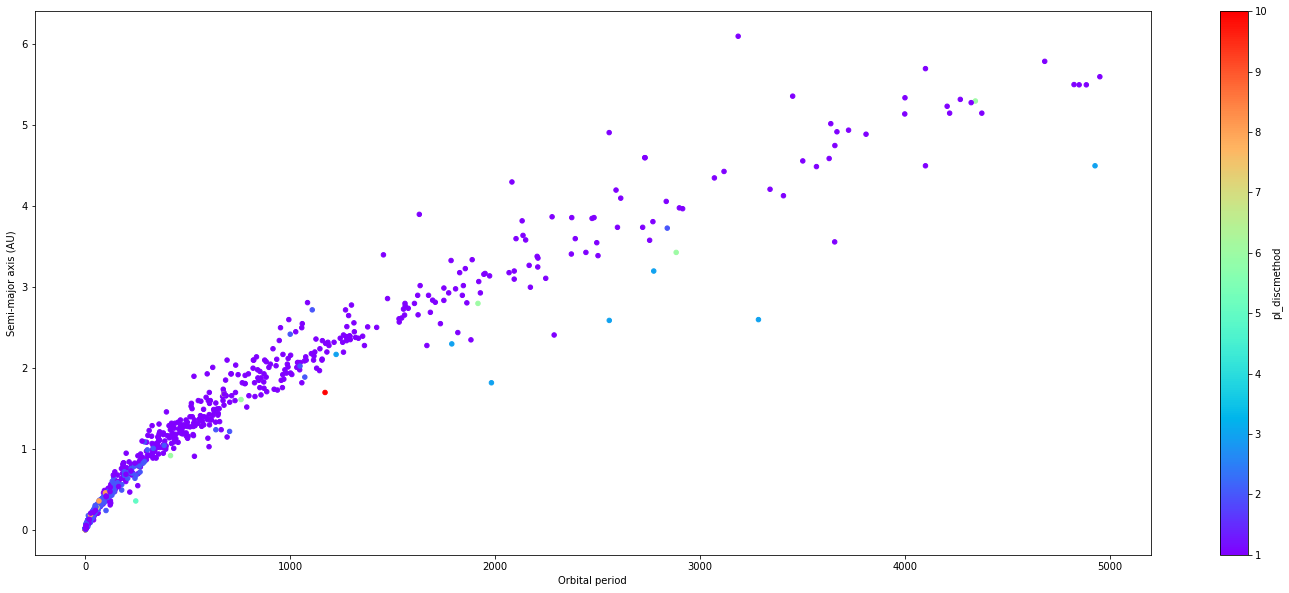

In [20]:
fig, ax = plt.subplots()

radiusPeriod.plot(kind='scatter',x='pl_orbper', y='pl_orbsmax', c='pl_discmethod', ax=ax, colormap='rainbow',figsize=(25, 10)) #Plots scatter graph

ax.set_xlabel("Orbital period")
ax.set_ylabel("Semi-major axis (AU)")

plt.show()

# WE NEED TO WRITE MARKDOWN TO CLEARLY CONVEY OUR CONCLUSIONS.

The above graph..

In [21]:
radiusPeriodStarMass = oec[["pl_orbsmax", "pl_orbper", "st_mass", "pl_discmethod"]]

StringToNum(radiusPeriodStarMass)

radiusPeriodStarMass = radiusPeriodStarMass[pd.notnull(radiusPeriodStarMass['pl_orbsmax'])]
radiusPeriodStarMass = radiusPeriodStarMass[pd.notnull(radiusPeriodStarMass['pl_orbper'])]
radiusPeriodStarMass = radiusPeriodStarMass[pd.notnull(radiusPeriodStarMass['st_mass'])]
radiusPeriodStarMass = radiusPeriodStarMass[pd.notnull(radiusPeriodStarMass['pl_discmethod'])]

radiusPeriodStarMass["pl_orbsmax"] = radiusPeriodStarMass["pl_orbsmax"] ** 3
radiusPeriodStarMass["pl_orbper"] = radiusPeriodStarMass["pl_orbper"] ** 2

In [22]:
radiusPeriodStarMass = radiusPeriodStarMass[radiusPeriodStarMass['pl_orbsmax'] < 50]
radiusPeriodStarMass = radiusPeriodStarMass[radiusPeriodStarMass['pl_orbper'] < 50]
radiusPeriodStarMass = radiusPeriodStarMass[radiusPeriodStarMass['st_mass'] < 50]

Text(0.5,0,'Host star mass (Solar masses)')

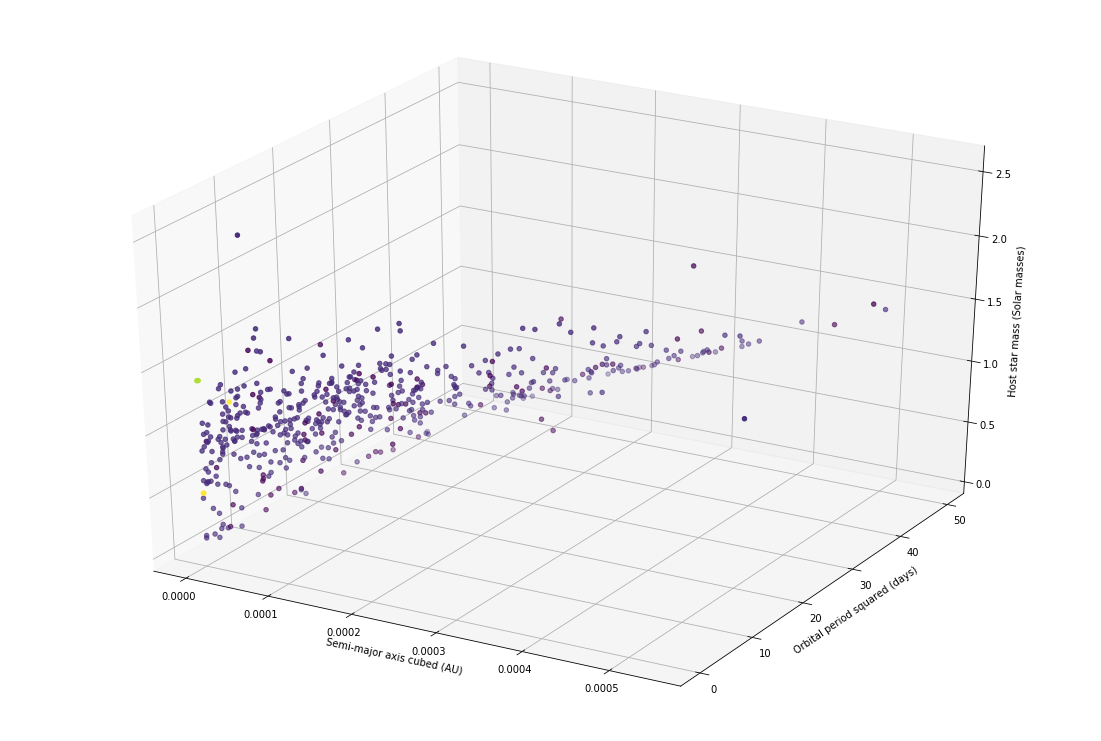

In [23]:
fig = plt.figure(figsize=(15, 10))

ax = Axes3D(fig)

ax.scatter(radiusPeriodStarMass['pl_orbsmax'], radiusPeriodStarMass['pl_orbper'], radiusPeriodStarMass['st_mass'], c=radiusPeriodStarMass['pl_discmethod'])

ax.set_xlabel("Semi-major axis cubed (AU)")
ax.set_ylabel("Orbital period squared (days)")
ax.set_zlabel("Host star mass (Solar masses)")

#NEXT WE NEED TO FIND POTENTIAL CANDIDATES FOR HABILITBILITY.
# WE NEED TO WRITE MARKDOWN TO CLEARLY CONVEY OUR CONCLUSIONS.
# spacing should be better now.
# Split cells up consistantly too ??

Again; The above graph plots the log(Orbital period (days)) in the X against the Eccentricity in the Y.

This describes the "objects" distance from its sun.

this is very helpful in planetary habilitibility as it relates to the habitable zone commonly known as the "goldilocks zone." The "Goldilocks zone" is a zone where the distance between the "Object" (planet) and the sun is in a zone; such that the planet is "not too hot" or "not too cold" hence the common name "goldilocks zone" in relation to the book; named "goldilocks and the three bears" written by Robert Southey.

if the planet is on the "goldilocks zone" then the planet has the right temperature for liquid water to exist on the planet. If the planet has potential for liquid water, the planet then has the chance of supporting life. for life to exist the planet must contain liquid water.

So depending on whether or not the planets are within the "goldilocks zone" contributes greatly to whether or not that planet can be habitable.

In [24]:
hostName = oec["pl_hostname"].values

count = 0

for i in range(len(hostName)):
    count += 1
    
print(count) # count chould be 3924 becuase there are 3924 entries in the dataset.

habProb = 30 / count

galaxy = np.random.uniform(size=(100000000))
habitable = galaxy <= habProb

np.count_nonzero(habitable)

3924


763248

Above I did a basic simulation with 100 Million planets and took our calculated probability which gives us about 700 thousand planets being habitable for every 100 Million planets we discover. This may seem like a lot but ultimately, each planet is light years away; so, us humans are unlikely able to make it our new home. The optimistic goldilocks zone doesn't really conclusively say whether or not a planet is habitable thus we must consider other characteristics we have been analysing throughout this project. For example, a large rocky planet with water may be in the habitable zone, which is good in all, however this planet may be much larger than earth and it's gravitational pull may be too strong for humans to survive. There are many other factors to consider too.

This helps put into perspective the rarity of a habitable planet and eases us into a sense of secuirty when it comes to the fact that another habitable planet may not exist. At least within a reachable distance.